# Titanic Project 

In [10]:
#Importing Libraries 
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [11]:
#loading the data from csv file to a pandas dataframe
TitanicData = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
TitanicData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
TitanicData.shape


(891, 12)

In [13]:
TitanicData


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Exploratory Data Analysis (EDA)

In [14]:
TitanicData.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
TitanicData =TitanicData.drop(["PassengerId", "Name"], axis=1)


In [16]:
TitanicData

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


Missing null values check

In [17]:
TitanicData.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [18]:
TitanicData = TitanicData.drop("Cabin", axis=1)


In [19]:
TitanicData


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [20]:
#Getting the basic summary and statistical information of the data
TitanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [21]:
TitanicData.skew()


Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [22]:
TitanicData.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A higher Std than mean in 'Fare' column indicates postive skewness.

In [23]:
#checking for unique elements in each of the column

TitanicData.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      3
dtype: int64

Analyzing the Target Class

In [24]:
TitanicData['Survived'].unique()


array([0, 1], dtype=int64)

In [25]:
TitanicData['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

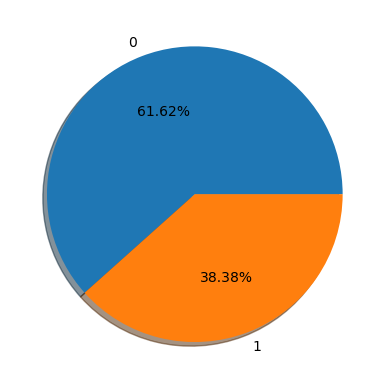

In [27]:
labels = '0','1'
fig, ax = plt.subplots()
ax.pie(TitanicData['Survived'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

In [28]:
#Analyzing Feature column Catergorical Classes
TitanicData['Sex'].unique() 

array(['male', 'female'], dtype=object)

In [29]:
TitanicData['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

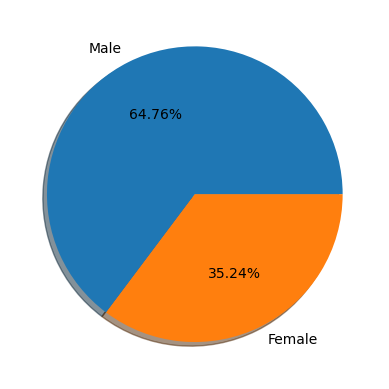

In [31]:
labels = 'Male','Female'
fig, ax = plt.subplots()
ax.pie(TitanicData['Sex'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

In [32]:
TitanicData['Pclass'].unique() 


array([3, 1, 2], dtype=int64)

In [33]:
TitanicData['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

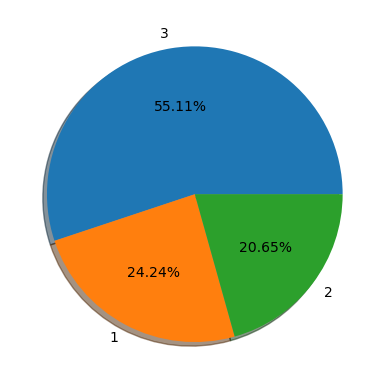

In [34]:
labels = '3','1','2'
fig, ax = plt.subplots()
ax.pie(TitanicData['Pclass'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

In [35]:
TitanicData['Embarked'].unique() 


array(['S', 'C', 'Q', nan], dtype=object)

In [36]:
TitanicData['Embarked'].isnull().sum()


2

In [37]:
TitanicData.loc[pd.isna(TitanicData["Embarked"]), :].index #finding the indices where 'Embarked' value is NaN


Int64Index([61, 829], dtype='int64')

In [38]:
TitanicData.drop([61,829],inplace=True)


In [39]:
TitanicData.shape


(889, 9)

In [40]:
TitanicData.reset_index(drop=True,inplace = True)


In [41]:
TitanicData['Embarked'].isnull().sum() 


0

All null values from 'Embarked' have been removed.



In [42]:
TitanicData['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

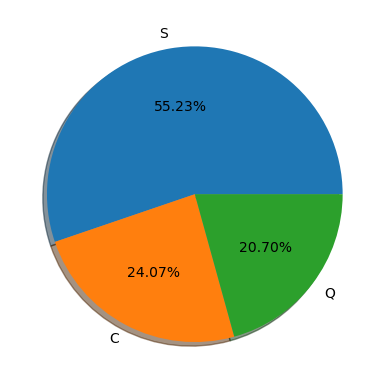

In [43]:
labels = 'S','C','Q'
fig, ax = plt.subplots()
ax.pie(TitanicData['Pclass'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

In [44]:
TitanicData['Sex'] = TitanicData.Sex.map({'female':0,'male':1})


In [45]:
DB = pd.get_dummies(TitanicData['Embarked'],drop_first = False)
DB

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
884,0,0,1
885,0,0,1
886,0,0,1
887,1,0,0


In [46]:
TitanicData = TitanicData.join(DB)


In [47]:
TitanicData.drop(columns = ['Embarked'],axis = 1, inplace = True)


In [48]:
TitanicData

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,0,3,1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,1,0,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,0,35.0,1,0,113803,53.1000,0,0,1
4,0,3,1,35.0,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,211536,13.0000,0,0,1
885,1,1,0,19.0,0,0,112053,30.0000,0,0,1
886,0,3,0,NaN,1,2,W./C. 6607,23.4500,0,0,1
887,1,1,1,26.0,0,0,111369,30.0000,1,0,0


In [49]:
TitanicData.drop(columns = ['Ticket'],inplace = True)
TitanicData


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,0,0,1
885,1,1,0,19.0,0,0,30.0000,0,0,1
886,0,3,0,NaN,1,2,23.4500,0,0,1
887,1,1,1,26.0,0,0,30.0000,1,0,0


<Axes: >

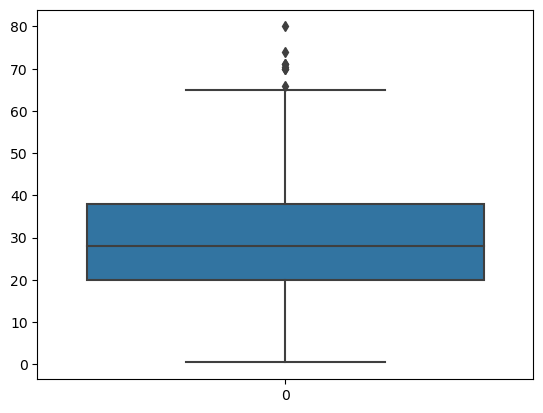

In [50]:
#Filling NaN values in 'Age' column
sns.boxplot(TitanicData['Age'])

In [58]:
#Using KNN Imputation technique for imputing missing data.
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=2)
TitanicData1= TitanicData.copy()

In [59]:
TitanicData1 = imp.fit_transform(TitanicData1[['Sex','Age']])


In [60]:
TitanicData1


array([[ 1., 22.],
       [ 0., 38.],
       [ 0., 26.],
       ...,
       [ 0., 32.],
       [ 1., 26.],
       [ 1., 32.]])

In [61]:
type(TitanicData1)


numpy.ndarray

In [62]:
TitanicData1 = pd.DataFrame(TitanicData1, columns=['Sex','Age'])


In [63]:
TitanicData1.index = TitanicData.index


In [64]:
TitanicData[['Age','Sex']] = TitanicData1[['Age','Sex']]


In [65]:
TitanicData['Age'].isnull().sum()


0

In [66]:
#Finding Correlation
t_corr = TitanicData.corr()
t_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
Survived,1.000000,-0.335549,-0.541585,-0.061387,-0.034040,0.083151,0.255290,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,0.127741,-0.327795,0.081656,0.016824,-0.548193,-0.245733,0.220558,0.076466
Sex,-0.541585,0.127741,1.000000,0.065452,-0.116348,-0.247508,-0.179958,-0.084520,-0.075217,0.121405
Age,-0.061387,-0.327795,0.065452,1.000000,-0.225819,-0.173839,0.091212,0.034131,-0.004313,-0.027190
SibSp,-0.034040,0.081656,-0.116348,-0.225819,1.000000,0.414542,0.160887,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,-0.247508,-0.173839,0.414542,1.000000,0.217532,-0.011588,-0.081585,0.061512
Fare,0.255290,-0.548193,-0.179958,0.091212,0.160887,0.217532,1.000000,0.270731,-0.116684,-0.163758
C,0.169966,-0.245733,-0.084520,0.034131,-0.060074,-0.011588,0.270731,1.000000,-0.148646,-0.782613
Q,0.004536,0.220558,-0.075217,-0.004313,-0.026692,-0.081585,-0.116684,-0.148646,1.000000,-0.499261
S,-0.151777,0.076466,0.121405,-0.027190,0.069438,0.061512,-0.163758,-0.782613,-0.499261,1.000000


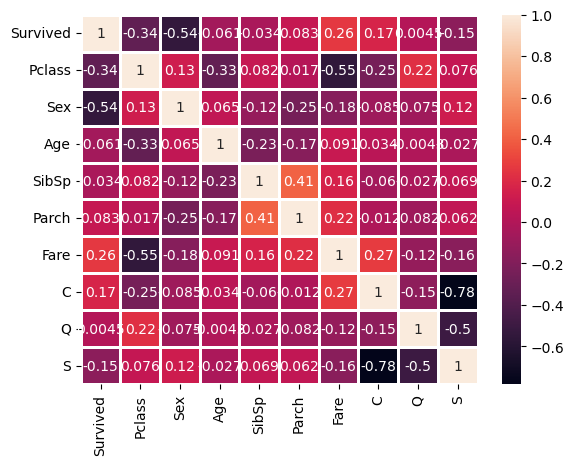

In [67]:
plt.figure
sns.heatmap(t_corr,annot=True,linewidth=1)
plt.show()

# Visualizing correlation of feature columns with label column

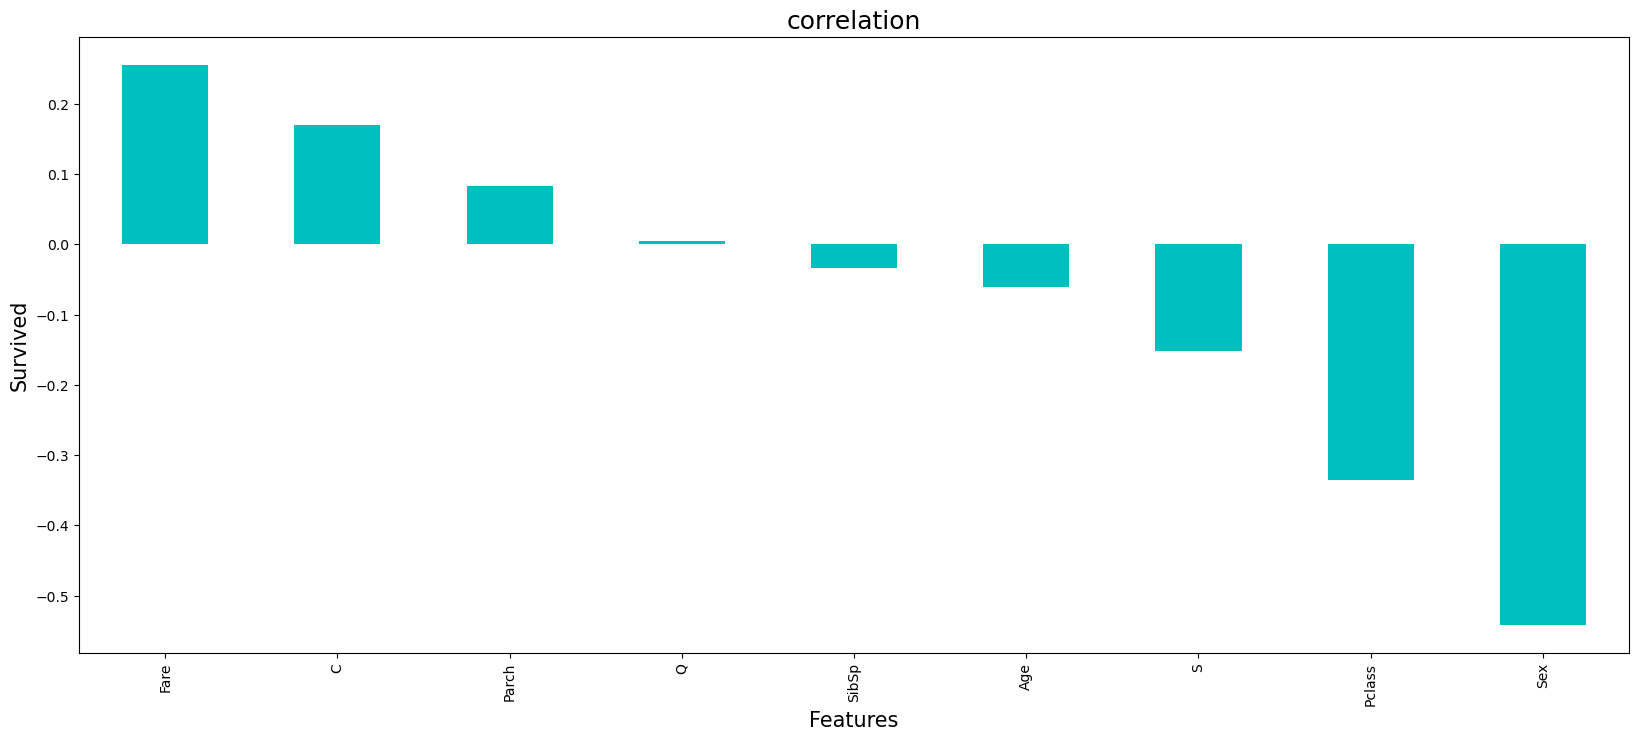

In [68]:
plt.figure(figsize = (20,8))
TitanicData.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Survived',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

In [69]:
X = TitanicData.drop(columns = ['Survived'])
y = TitanicData['Survived']

# Interpreting Relationship between Dependent Variable and Independent Variables

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

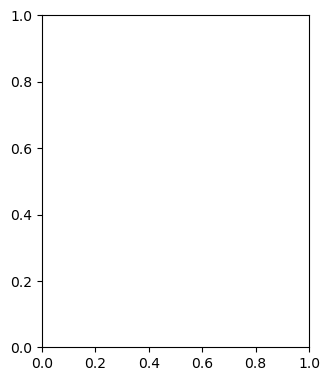

In [79]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y=TitanicData['Survived']
X=TitanicData[['Age','Fare']]
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Survived',fontsize=20)
        plt.ylabel(col,fontsize=20)
plotnum+=1
plt.tight_layout()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

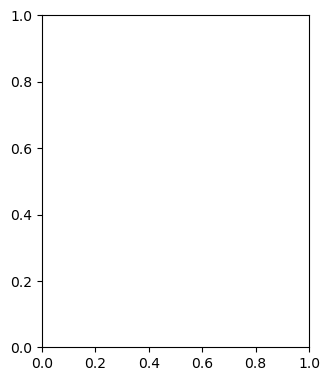

In [71]:
#'Survived' vs Categorical/Discrete Data Columns

plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = TitanicData['Survived']
X = TitanicData.drop(columns=['Survived','Age','Fare'])
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Survived',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

In [72]:
TitanicData['Families'] = TitanicData['Parch']+TitanicData['SibSp']


In [73]:
TitanicData['Families']


0      1
1      1
2      0
3      1
4      0
      ..
884    0
885    0
886    3
887    0
888    0
Name: Families, Length: 889, dtype: int64

In [75]:
#Dropping columns 'SibSp' and 'Parch'
TitanicData.drop(columns=['SibSp','Parch'],inplace=True )

<Axes: xlabel='Survived', ylabel='Age'>

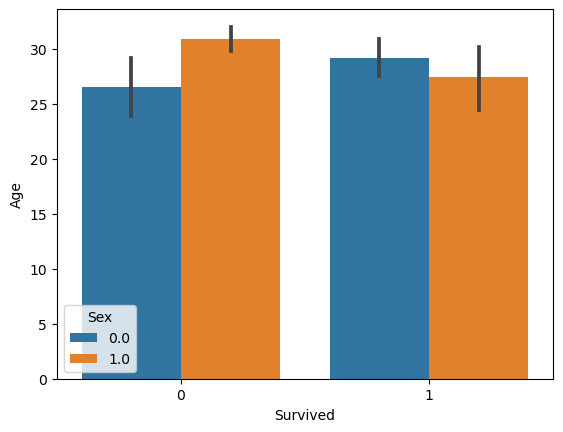

In [77]:
sns.barplot(x =TitanicData['Survived'],y = TitanicData['Age'], hue = TitanicData['Sex'])


In [80]:
TitanicData

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Families
0,0,3,1.0,22.0,7.2500,0,0,1,1
1,1,1,0.0,38.0,71.2833,1,0,0,1
2,1,3,0.0,26.0,7.9250,0,0,1,0
3,1,1,0.0,35.0,53.1000,0,0,1,1
4,0,3,1.0,35.0,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...
884,0,2,1.0,27.0,13.0000,0,0,1,0
885,1,1,0.0,19.0,30.0000,0,0,1,0
886,0,3,0.0,32.0,23.4500,0,0,1,3
887,1,1,1.0,26.0,30.0000,1,0,0,0


# Handling the Outliers

In [81]:
X = TitanicData.drop(columns = ['Survived'])
y = TitanicData['Survived']

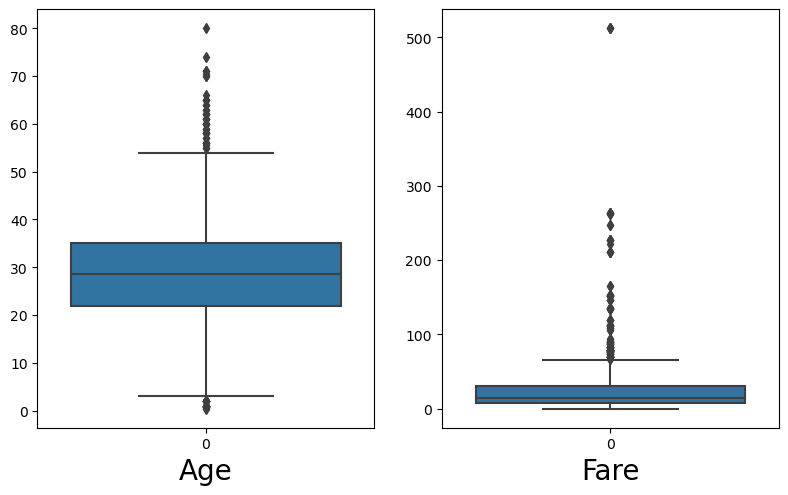

In [82]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
feat= ['Age','Fare']
for col in X[feat]:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# Removing Outliers using Z score Method

In [84]:
df2 = X[feat].copy()


In [85]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [86]:
df3.shape


(862, 2)

In [87]:
df2.shape


(889, 2)

In [88]:
#Data loss % check
loss = (889-862)/889*100

In [89]:
loss

3.0371203599550056

Data loss= 3.03%



# Removing Outliers using IQR Method

In [90]:
df =X[feat].copy()


In [91]:
indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)
# find all the indices of outliers in the columns using IQR and append them to indxdrop array 

In [92]:
indxdrop 

array([  7.,  11.,  15.,  16.,  33.,  54.,  77.,  93.,  95., 115., 118.,
       151., 163., 169., 171., 173., 182., 194., 204., 231., 251., 267.,
       274., 279., 296., 304., 325., 339., 365., 380., 385., 437., 455.,
       466., 468., 478., 482., 486., 491., 492., 529., 544., 554., 569.,
       586., 624., 625., 629., 641., 643., 646., 658., 671., 683., 693.,
       744., 754., 771., 787., 802., 823., 826., 829., 849., 877.,   1.,
        27.,  31.,  34.,  52.,  61.,  71.,  87., 101., 117., 119., 123.,
       138., 150., 158., 179., 194., 200., 214., 217., 223., 229., 244.,
       255., 256., 257., 261., 267., 268., 274., 289., 290., 296., 298.,
       304., 305., 306., 309., 310., 317., 318., 323., 324., 331., 333.,
       335., 336., 340., 365., 368., 372., 374., 376., 379., 384., 389.,
       392., 411., 434., 437., 444., 452., 483., 485., 495., 497., 503.,
       504., 519., 526., 536., 539., 543., 549., 556., 557., 580., 584.,
       586., 590., 608., 626., 640., 644., 654., 65

In [93]:
df = df.drop(indxdrop)


In [94]:
df.shape


(721, 2)

In [95]:
loss=(889-721)/889 * 100
loss

18.89763779527559

18.89% data loss is outside acceptable range.



# Using Z score method to reduce outliers

In [96]:
dropindx = X.index.difference(df3.index)
dropindx


Int64Index([ 27,  87,  95, 115, 117, 257, 298, 310, 340, 376, 379, 437, 492,
            526, 556, 629, 671, 678, 688, 699, 715, 729, 736, 741, 744, 778,
            849],
           dtype='int64')

In [97]:
TitanicData.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe


In [98]:
X = TitanicData.drop(columns = ['Survived'])
y = TitanicData['Survived']

In [99]:
X.isnull().sum()


Pclass      0
Sex         0
Age         0
Fare        0
C           0
Q           0
S           0
Families    0
dtype: int64

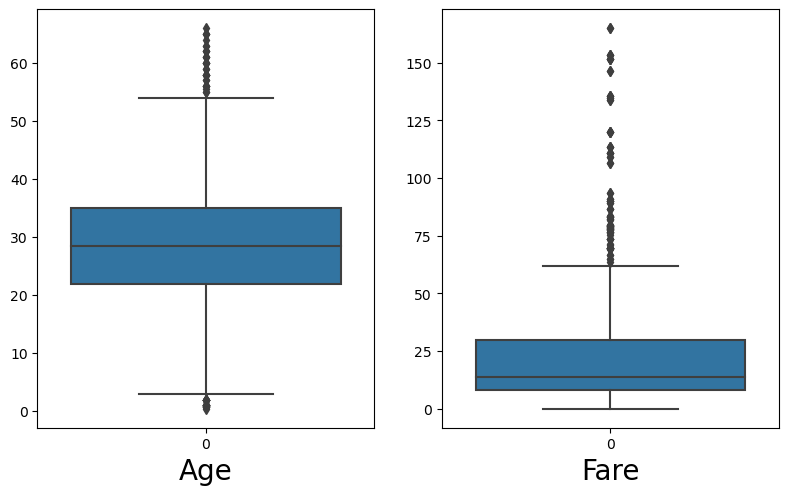

In [100]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
feat= ['Age','Fare']
for col in X[feat]:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# Normalizing Data Distribution

In [101]:
X[feat].skew()


Age     0.238238
Fare    2.279424
dtype: float64

In [102]:
(X[feat]==0).sum()


Age      0
Fare    15
dtype: int64

In [103]:
# Using KNN Imputation technique for imputing missing data.
imp = KNNImputer(n_neighbors=2)

In [104]:
X_filled = X.copy()


In [105]:
X_filled = imp.fit_transform(X_filled[['Pclass','Fare']])


In [106]:
X_filled


array([[ 3.    ,  7.25  ],
       [ 1.    , 71.2833],
       [ 3.    ,  7.925 ],
       ...,
       [ 3.    , 23.45  ],
       [ 1.    , 30.    ],
       [ 3.    ,  7.75  ]])

In [107]:
type(X_filled)


numpy.ndarray

In [108]:
X_filled = pd.DataFrame(X_filled, columns=['Pclass','Fare']) #to convert numpy array back into dataframe


In [109]:
X_filled.index = X.index


In [110]:
X[['Pclass','Fare']] = X_filled[['Pclass','Fare']]


In [111]:
X['Fare'].isnull().sum()


0

No values missing from 'Fare' column



In [112]:
X.skew()


Pclass     -0.715372
Sex        -0.639189
Age         0.238238
Fare        2.279424
C           1.680697
Q           2.910027
S          -1.056235
Families    2.802387
dtype: float64

# Reducing skewness further using PowerTransformer

In [113]:
from sklearn.preprocessing import PowerTransformer


In [114]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)
df4 = X[['Fare','Families']]
transformed= powtrans.fit_transform(df4)
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe
transformed.skew()

Fare       -0.009414
Families    0.546482
dtype: float64

In [115]:
transformed.index = X.index
X[['Fare','Families']] = transformed[['Fare','Families']]
X.skew()

Pclass     -0.715372
Sex        -0.639189
Age         0.238238
Fare       -0.009414
C           1.680697
Q           2.910027
S          -1.056235
Families    0.546482
dtype: float64

In [116]:
X.isnull().sum()


Pclass      0
Sex         0
Age         0
Fare        0
C           0
Q           0
S           0
Families    0
dtype: int64

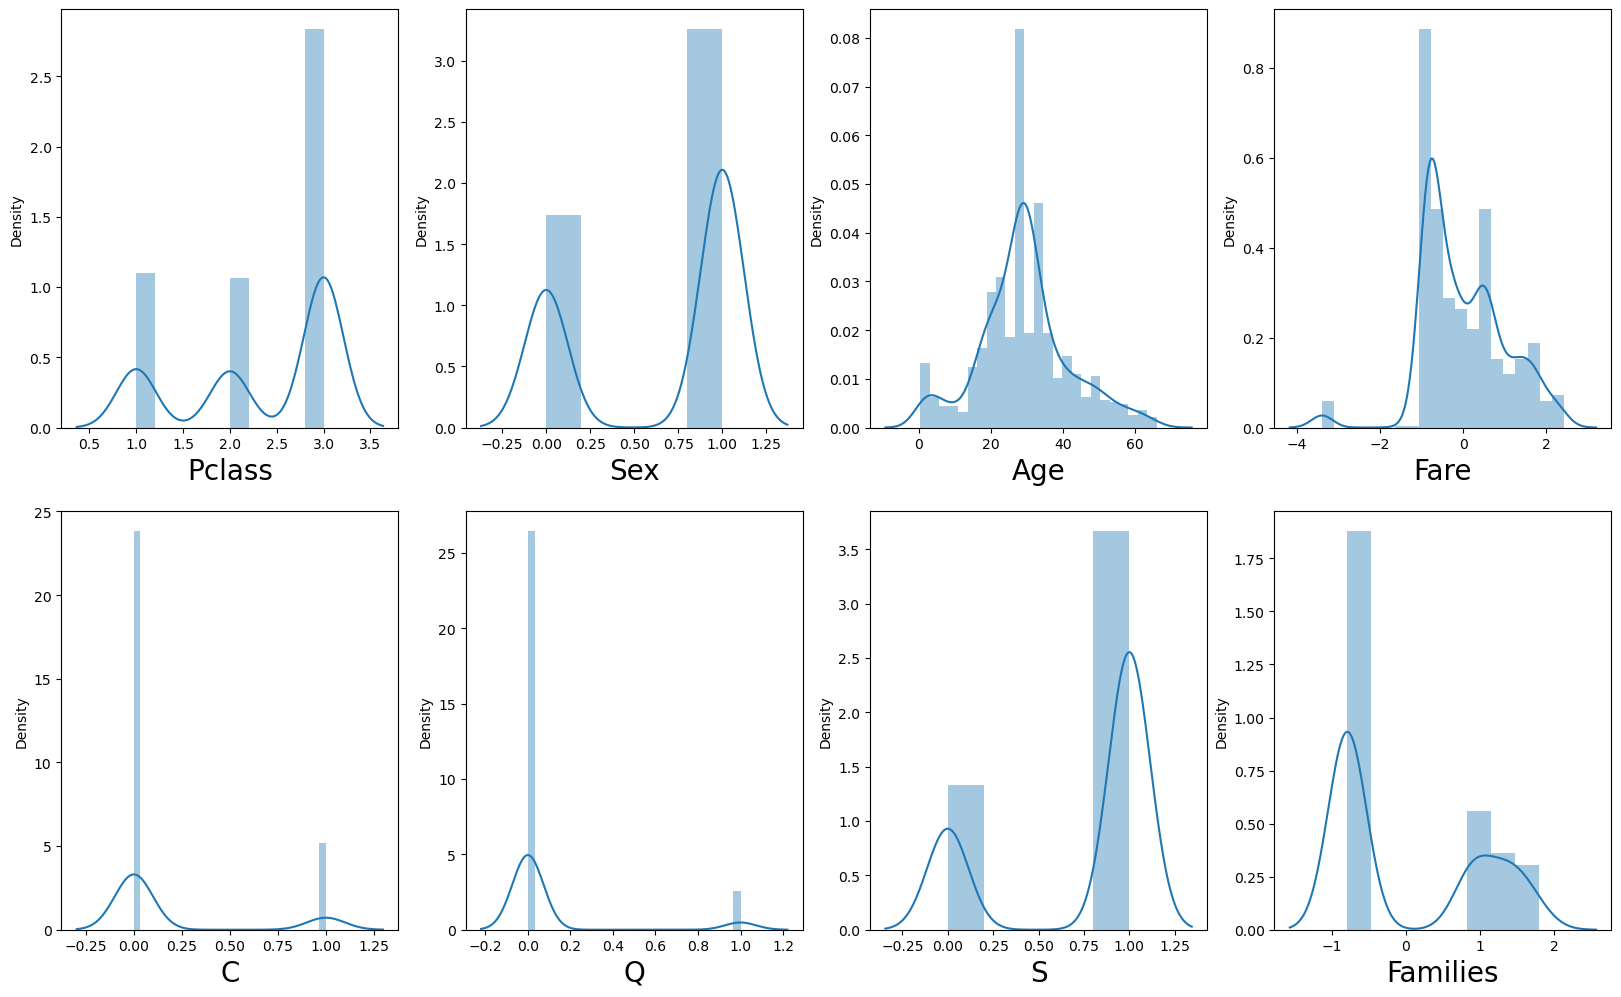

In [117]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# Feature Selection

In [118]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X 

array([[ 0.7994893 ,  0.73062154, -0.58138018, ..., -0.31095355,
         0.60326118,  0.90850781],
       [-1.64868042, -1.36869768,  0.702247  , ..., -0.31095355,
        -1.65765681,  0.90850781],
       [ 0.7994893 , -1.36869768, -0.26047338, ..., -0.31095355,
         0.60326118, -0.79210461],
       ...,
       [ 0.7994893 , -1.36869768,  0.22088681, ..., -0.31095355,
         0.60326118,  1.52047922],
       [-1.64868042,  0.73062154, -0.26047338, ..., -0.31095355,
        -1.65765681, -0.79210461],
       [ 0.7994893 ,  0.73062154,  0.22088681, ...,  3.21591437,
        -1.65765681, -0.79210461]])

# Checking for Multicollinearity using Variance Inflation Factor

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [120]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,Pclass,2.090198
1,Sex,1.143503
2,Age,1.205194
3,Fare,2.514240
4,C,inf
5,Q,inf
6,S,inf
7,Families,1.656581


Selecting Kbest Features

In [121]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeat = SelectKBest(score_func = f_classif, k = 8)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(11,'Score'))

    Feature       Score
1       Sex  339.693591
0    Pclass  105.325560
3      Fare   97.228558
7  Families   28.326530
4         C   23.201391
6         S   19.167697
2       Age    2.575024
5         Q    0.111014


# Buidling classification model

In [135]:
from sklearn.model_selection import train_test_split


In [136]:
#Finding the best random state
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(scaled_X,y,test_size=.31, random_state=i,stratify=y)
    modRF=RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred=modRF.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is:{maxAcc} on random_state: {maxRS}")

Best Accuracy is:0.8470149253731343 on random_state: 8


In [140]:
x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .31, stratify = y,random_state = 8) #since 


In [152]:
from . import cluster
from ._classification import (
    accuracy_score,
    balanced_accuracy_score,
    brier_score_loss,
    class_likelihood_ratios,
    classification_report,
    cohen_kappa_score,
    confusion_matrix,
    f1_score,
    fbeta_score,
    hamming_loss,
    hinge_loss,
    jaccard_score,
    log_loss,
    matthews_corrcoef,
    multilabel_confusion_matrix,
    precision_recall_fscore_support,
    precision_score,
    recall_score,
    zero_one_loss,
    )
from ._dist_metrics import DistanceMetric
from ._plot.confusion_matrix import ConfusionMatrixDisplay
from ._plot.det_curve import DetCurveDisplay
from ._plot.precision_recall_curve import PrecisionRecallDisplay
from ._plot.regression import PredictionErrorDisplay
from ._plot.roc_curve import RocCurveDisplay
from ._ranking import (
    auc,
    average_precision_score,
    coverage_error,
    dcg_score,
    det_curve,
    label_ranking_average_precision_score,
    label_ranking_loss,
    ndcg_score,
    precision_recall_curve,
    roc_auc_score,
    roc_curve,
    top_k_accuracy_score,
)
from ._regression import (
    d2_absolute_error_score,
    d2_pinball_score,
    d2_tweedie_score,
    explained_variance_score,
    max_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_gamma_deviance,
    mean_pinball_loss,
    mean_poisson_deviance,
    mean_squared_error,
    mean_squared_log_error,
    mean_tweedie_deviance,
    median_absolute_error,
    r2_score,
)
from ._scorer import check_scoring, get_scorer, get_scorer_names, make_scorer
from .cluster import (
    adjusted_mutual_info_score,
    adjusted_rand_score,
    calinski_harabasz_score,
    completeness_score,
    consensus_score,
    davies_bouldin_score,
    fowlkes_mallows_score,
    homogeneity_completeness_v_measure,
    homogeneity_score,
    mutual_info_score,
    normalized_mutual_info_score,
    pair_confusion_matrix,
    rand_score,
    silhouette_samples,
    silhouette_score,
    v_measure_score,
)
from .pairwise import (
    euclidean_distances,
    nan_euclidean_distances,
    pairwise_distances,
    pairwise_distances_argmin,
    pairwise_distances_argmin_min,
    pairwise_distances_chunked,
    pairwise_kernels,
)

__all__ =[
    "accuracy_score",
    "adjusted_mutual_info_score",
    "adjusted_rand_score",
    "auc",
    "average_precision_score",
    "balanced_accuracy_score",
    "calinski_harabasz_score",
    "check_scoring",
    "class_likelihood_ratios",
    "classification_report",
    "cluster",
    "cohen_kappa_score",
    "completeness_score",
    "ConfusionMatrixDisplay",
    "confusion_matrix",
    "consensus_score",
    "coverage_error",
    "d2_tweedie_score",
    "d2_absolute_error_score",
    "d2_pinball_score",
    "dcg_score",
    "davies_bouldin_score",
    "DetCurveDisplay",
    "det_curve",
    "DistanceMetric",
    "euclidean_distances",
    "explained_variance_score",
    "f1_score",
    "fbeta_score",
    "fowlkes_mallows_score",
    "get_scorer",
    "hamming_loss",
    "hinge_loss",
    "homogeneity_completeness_v_measure",
    "homogeneity_score",
    "jaccard_score",
    "label_ranking_average_precision_score",
    "label_ranking_loss",
    "log_loss",
    "make_scorer",
    "nan_euclidean_distances",
    "matthews_corrcoef",
    "max_error",
    "mean_absolute_error",
    "mean_squared_error",
    "mean_squared_log_error",
    "mean_pinball_loss",
    "mean_poisson_deviance",
    "mean_gamma_deviance",
    "mean_tweedie_deviance",
    "median_absolute_error",
    "mean_absolute_percentage_error",
    "multilabel_confusion_matrix",
    "mutual_info_score",
    "ndcg_score",
    "normalized_mutual_info_score",
    "pair_confusion_matrix",
    "pairwise_distances",
    "pairwise_distances_argmin",
    "pairwise_distances_argmin_min",
    "pairwise_distances_chunked",
    "pairwise_kernels",
    "PrecisionRecallDisplay",
    "precision_recall_curve",
    "precision_recall_fscore_support",
    "precision_score",
    "PredictionErrorDisplay",
    "r2_score",
    "rand_score",
    "recall_score",
    "RocCurveDisplay",
    "roc_auc_score",
    "roc_curve",
    "get_scorer_names",
    "silhouette_samples",
    "silhouette_score",
    "top_k_accuracy_score",
    "v_measure_score",
    "zero_one_loss",
    "brier_score_loss",]


    



ImportError: attempted relative import with no known parent package

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\Manisha Singh\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\__init__.py)

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [155]:
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC()
KNN = KNeighborsClassifier()

In [156]:
#Training the Models
DTC.fit(x_train,y_train)
RFC.fit(x_train,y_train)
SV.fit(x_train,y_train)
LOGR.fit(x_train,y_train)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

# Decision Tree Classifier Model Accuracy

In [157]:
DTCpred = DTC.predict(x_test)
accu = classification_report(y_test,DTCpred)
conf_matrx = confusion_matrix(y_test,DTCpred)
conf_matrx

array([[136,  31],
       [ 24,  77]], dtype=int64)

In [158]:
print(accu)


              precision    recall  f1-score   support

           0       0.85      0.81      0.83       167
           1       0.71      0.76      0.74       101

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.80      0.79      0.80       268



# Logistic Regression Model Accuracy

In [159]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[139,  28],
       [ 29,  72]], dtype=int64)

In [160]:
print(accu)


              precision    recall  f1-score   support

           0       0.83      0.83      0.83       167
           1       0.72      0.71      0.72       101

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



# Random Forest Classifier Model Accuracy

In [161]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[145,  22],
       [ 20,  81]], dtype=int64)

In [162]:
print(accu)


              precision    recall  f1-score   support

           0       0.88      0.87      0.87       167
           1       0.79      0.80      0.79       101

    accuracy                           0.84       268
   macro avg       0.83      0.84      0.83       268
weighted avg       0.84      0.84      0.84       268



# SV Classifier Model Accuracy

In [163]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
conf_matrx

array([[155,  12],
       [ 34,  67]], dtype=int64)

In [164]:
print(accu)


              precision    recall  f1-score   support

           0       0.82      0.93      0.87       167
           1       0.85      0.66      0.74       101

    accuracy                           0.83       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.83      0.82       268



# K Nearest Neighbours Classifier Model Accuracy

In [165]:
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)
conf_matrx = confusion_matrix(y_test,KNNpred)
conf_matrx

array([[147,  20],
       [ 31,  70]], dtype=int64)

In [166]:
print(accu)


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       167
           1       0.78      0.69      0.73       101

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



# Model Cross Validation

In [167]:
from sklearn.model_selection import cross_val_score as cvs


In [168]:
# Decision Tree Classifier
print(cvs(DTC,scaled_X,y,cv=5).mean())  

0.7726576152708697


In [169]:
#Logistic Regression
print(cvs(LOGR,scaled_X,y,cv=5).mean()) 

0.7888560290361608


In [170]:
#Random Forest Classifier
print(cvs(RFC,scaled_X,y,cv=5).mean())

0.8028431240758167


In [171]:
#SV Classifier
print(cvs(SV,scaled_X,y,cv=5).mean())

0.8155464444145718


In [172]:
#K Nearest Neighbours Classifier
print(cvs(KNN,scaled_X,y,cv=5).mean())

0.8121857776582875


# ROC AUC Scores

In [173]:
#Decision Tree Classifier
roc_auc_score(y_test,DTCpred)

0.7883737475543962

In [174]:
#Logistic Regression
roc_auc_score(y_test,LOGRpred)

0.7726033082350151

In [175]:
#Random Forest Classifier
roc_auc_score(y_test,RFCpred)

0.835121835536847

In [176]:
#SV Classifier
roc_auc_score(y_test,SVpred)

0.795755024604257

In [177]:
#K Nearest Neighbours Classifier
roc_auc_score(y_test,KNNpred)

0.7866544139443884

Random Forest Classifier is the best model for the dataset, with roc_auc_score 0.8441



# Hyper Parameter Tuning

In [182]:
from sklearn.model_selection import GridSearchCV


In [183]:
#Random Forest Classifier
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]})

In [184]:
GridCV.best_params_


{'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 50}

In [185]:
Best_mod1 = RandomForestClassifier(n_estimators = 60,criterion = 'gini', max_depth= 10, max_features = 'log2',min_samples_leaf = 5, min_samples_split = 2)
Best_mod1.fit(x_train,y_train)
rfpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

83.2089552238806


In [186]:
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

array([[156,  11],
       [ 34,  67]], dtype=int64)

In [187]:
cr = classification_report(y_test,rfpred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       167
           1       0.86      0.66      0.75       101

    accuracy                           0.83       268
   macro avg       0.84      0.80      0.81       268
weighted avg       0.84      0.83      0.83       268



In [188]:
import joblib
joblib.dump(Best_mod1,"BestModelTitanic.pkl")

['BestModelTitanic.pkl']

# Loading The Model

In [189]:
mod=joblib.load("BestModelTitanic.pkl")


In [190]:
print(mod.predict(x_test))


[0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 0 0 0 0 0 0]
